In [1]:
%pip install networkx">=2.5"
%pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.0 MB/s eta 0:00:00


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [3]:
asset_value = ctrl.Antecedent(np.arange(0, 10001, 1), 'valor_patrimonial')
monthly_income = ctrl.Antecedent(np.arange(1000, 10001, 1), 'renda_mensal')
customer_potential = ctrl.Consequent(np.arange(0, 11, 1), 'potencial_cliente')


asset_value['baixo'] = fuzz.trimf(asset_value.universe, [-4000, 0, 4000])
asset_value['medio'] = fuzz.trimf(asset_value.universe, [1000, 5000, 9000])
asset_value['alto'] = fuzz.trimf(asset_value.universe, [6000, 10000, 14000])

monthly_income['baixa'] = fuzz.trimf(monthly_income.universe, [-3200, 1000, 3400])
monthly_income['media'] = fuzz.trimf(monthly_income.universe, [1000, 3400, 6700])
monthly_income['alta'] = fuzz.trimf(monthly_income.universe, [3400, 6700, 10000])
monthly_income['muito_alta'] = fuzz.trimf(monthly_income.universe, [6700, 10000, 13300])

customer_potential['baixo'] = fuzz.trapmf(customer_potential.universe, [-3.6, -0.4, 0.4, 3.6])
customer_potential['medio'] = fuzz.trimf(customer_potential.universe, [1, 5, 9])
customer_potential['alto'] = fuzz.trimf(customer_potential.universe, [6, 10, 14])

In [4]:
rule1 = ctrl.Rule(asset_value['baixo'] & monthly_income['baixa'], customer_potential['baixo'])
rule2 = ctrl.Rule(asset_value['baixo'] & monthly_income['media'], customer_potential['baixo'])
rule3 = ctrl.Rule(asset_value['baixo'] & monthly_income['alta'], customer_potential['medio'])
rule4 = ctrl.Rule(asset_value['baixo'] & monthly_income['muito_alta'], customer_potential['alto'])

rule5 = ctrl.Rule(asset_value['medio'] & monthly_income['baixa'], customer_potential['baixo'])
rule6 = ctrl.Rule(asset_value['medio'] & monthly_income['media'], customer_potential['medio'])
rule7 = ctrl.Rule(asset_value['medio'] & monthly_income['alta'], customer_potential['alto'])
rule8 = ctrl.Rule(asset_value['medio'] & monthly_income['muito_alta'], customer_potential['alto'])

rule9 = ctrl.Rule(asset_value['alto'] & monthly_income['baixa'], customer_potential['medio'])
rule10 = ctrl.Rule(asset_value['alto'] & monthly_income['media'], customer_potential['medio'])
rule11 = ctrl.Rule(asset_value['alto'] & monthly_income['alta'], customer_potential['alto'])
rule12 = ctrl.Rule(asset_value['alto'] & monthly_income['muito_alta'], customer_potential['alto'])

8.656565656565656


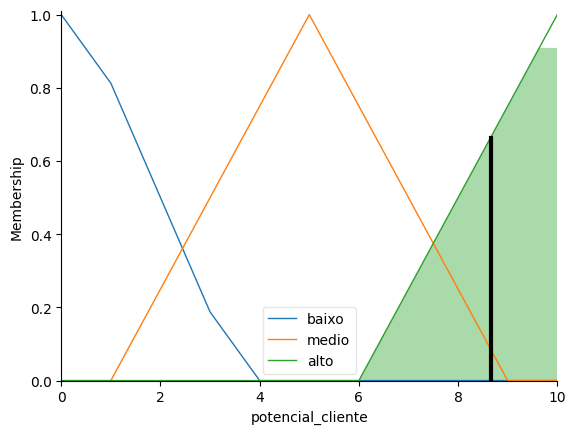

In [5]:
control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6,
                                     rule7, rule8, rule9, rule10, rule11, rule12])

simulation = ctrl.ControlSystemSimulation(control_system)

simulation.input['valor_patrimonial'] = 5000
simulation.input['renda_mensal'] = 7000

simulation.compute()

print(simulation.output['potencial_cliente'])
customer_potential.view(sim=simulation)